In [1]:
import pandas as pd
import numpy as np 

df = pd.read_pickle("defect_df.p")
df = df.loc[df["defect_formation_energy"] >0]

In [2]:
df_soap_magpie_c = pd.read_pickle("df_soap_magpie_c.pkl")


In [3]:
df2 = pd.read_pickle("s_m_c_reduced.pkl")

In [4]:
df2.shape

(1665, 98)

In [57]:
df_soap_magpie_c.shape

(1665, 345)

In [5]:
df["defect_formation_energy"].quantile(0.1)

3.3389690199999538

In [6]:


df.loc[df["defect_formation_energy"] > 3.0, "classification"] = int(False)
df.loc[df["defect_formation_energy"] <= 3.0, "classification"] = int(True)


In [7]:
y = df["classification"]

In [66]:
df_graph = df.copy()

df_graph.loc[df_graph["defect_formation_energy"] > 3.0, "classification"] = "High"
df_graph.loc[df_graph["defect_formation_energy"] <= 3.0, "classification"] = "Low"


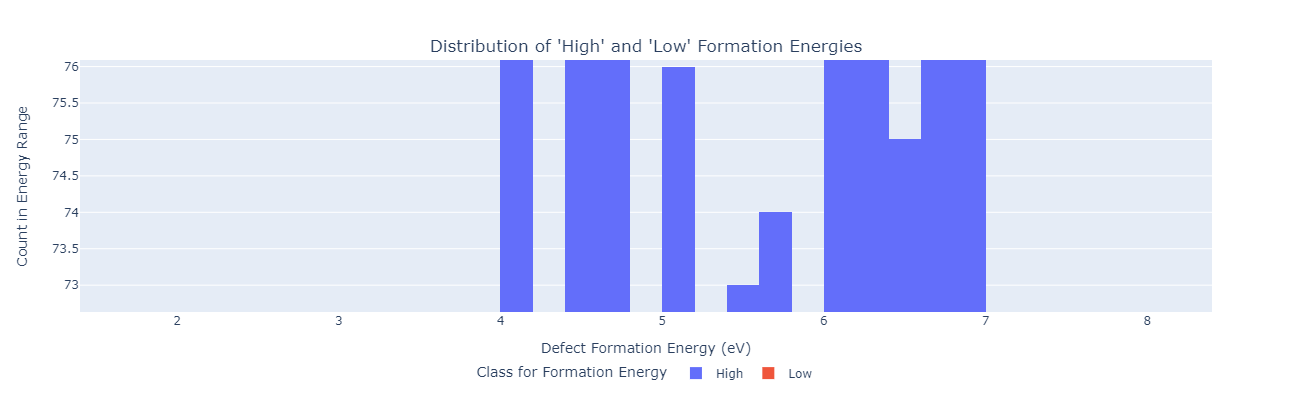

In [68]:
import plotly.express as px

fig2 = px.histogram(df_graph, x = "defect_formation_energy", color = "classification", labels = {"classification": "Class for Formation Energy", "0.0":"High",1.0:"Low"})
fig2.update_layout (yaxis=dict(
        title="Count in Energy Range"
    ),
    xaxis=dict(
        title="Defect Formation Energy (eV)"
    ),width = 700, height = 400, title={
        'text': "Distribution of 'High' and 'Low' Formation Energies",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
     legend = dict(orientation = "h",
                   yanchor = "bottom",
                   y = -0.3,
                   xanchor = "center",
                   x = 0.5))

fig2.show()


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(df_soap_magpie_c,y, random_state = 42)
clf = RandomForestClassifier(max_depth = 2, random_state = 42)
clf = RandomForestClassifier(max_depth=2, random_state=1337)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))
average_precision_score



<function sklearn.metrics._ranking.average_precision_score(y_true, y_score, *, average='macro', pos_label=1, sample_weight=None)>

In [9]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train, feature_names = X_train.columns)
dtest = xgb.DMatrix(data = X_test, label = y_test, feature_names = X_test.columns)
xclf = xgb.XGBClassifier()
xclf.fit(X_train,y_train)
accuracy_score(y_test,xclf.predict(X_test))



0.9640287769784173

In [28]:
from sklearn.metrics import accuracy_score, average_precision_score
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
predictions = cross_val_predict( xgb.XGBClassifier(),df2, y, cv = kf)
probabiltiies = cross_val_predict( xgb.XGBClassifier(),df2, y, cv = kf, method = "predict_proba")

In [24]:
predictions

array([[0.9951232 , 0.00487679],
       [0.9985399 , 0.00146007],
       [0.99868953, 0.00131047],
       ...,
       [0.9860903 , 0.01390968],
       [0.7364548 , 0.26354522],
       [0.9987366 , 0.0012634 ]], dtype=float32)

In [75]:
average_precision_score(y_test, probabilities[:, 1])

/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:33:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:33:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:33:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:33:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:33:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y, predictions))
print(recall_score(y, predictions))
print(f1_score(y,predictions))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

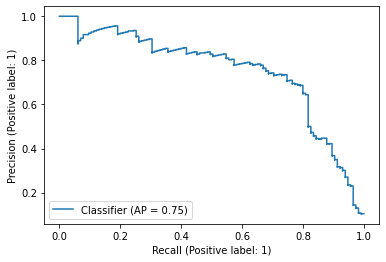

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y,probabilities[:, 1])

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
xgbc = xgb.XGBClassifier()
xgbc.fit(df2,
PrecisionRecallDisplay.from_estimator(,df2,y)

XGBoostError: need to call fit or load_model beforehand

/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning,

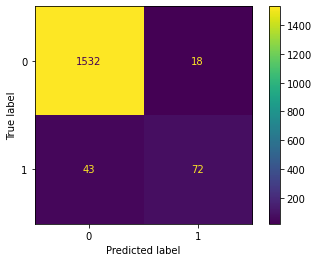

In [84]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = cross_val_predict( xgb.XGBClassifier(verbosity=0),df_soap_magpie_c, y, cv = kf)

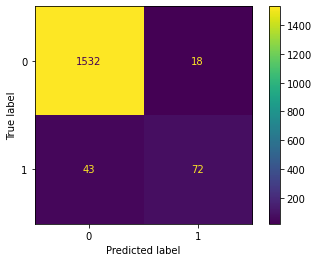

In [85]:
cm = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [32]:
weights = (y == 0).sum() / (1.0 * (y == 1).sum())
weights2 = np.sqrt((y == 0).sum() / (1.0 * (y == 1).sum()))

In [18]:
weights2

3.6712751013190523

In [52]:
import xgboost as xgb
import warnings
from sklearn.model_selection import cross_val_score
kf3 = KFold(n_splits = 3, shuffle = True, random_state = 42)

warnings.filterwarnings("ignore") 
def create_model(assignments):
    model = xgb.XGBClassifier(
        min_child_weight = assignments['min_child_weight'],
        max_depth        = assignments['max_depth'],
        gamma            = assignments['gamma'],
        subsample        = assignments['subsample'],
        colsample_bytree = assignments['colsample_bytree'],
        reg_lambda       = np.exp(assignments['lambda']),
        reg_alpha        = np.exp(assignments['alpha']),
        learning_rate    = np.exp(assignments['log_learning_rate']),
        # SigOpt-optimized parameters end here
        scale_pos_weight = weights,
        max_delta_step = 1,
        n_jobs = 4)
    return model
def evaluate_model(assignments):
    model = create_model(assignments)
    probabilities = cross_val_predict(model, df2, y, cv = kf)
    f1 = f1_score(y, probabilities)
    
    return [ dict(name="f1", value = f1)]
    


In [54]:
from sigopt import Connection
 
# put your token here
api_token = 
 
conn = Connection(client_token=api_token)

In [55]:
experiment = conn.experiments().create(
    
    name="Classification Final1",
    
    parameters=[
        dict(name="min_child_weight", bounds=dict(min=2,max=15), type="int"),
        dict(name="max_depth", bounds=dict(min=3,max=10), type="int"),
        dict(name="gamma", bounds=dict(min=0,max=5), type="double"),
        dict(name="subsample", bounds=dict(min=0.5,max=1), type="double"),
        dict(name="colsample_bytree", bounds=dict(min=0.5,max=1), type="double"),
        dict(name="lambda", bounds=dict(min=np.log(0.00001), max=np.log(1)), type="double"),
        dict(name="alpha", bounds=dict(min=np.log(0.00001), max=np.log(1)), type="double"),
        dict(name="log_learning_rate", bounds=dict(min=np.log(0.00001),max=np.log(1)), type="double")
        ],

 
    metrics=[
        dict(name="f1", objective="maximize", strategy="optimize")
        ],
 
    observation_budget = 120,
    project = "classification"
)
 
print("Explore your experiment: https://app.sigopt.com/experiment/" + experiment.id + "/analysis")

Explore your experiment: https://app.sigopt.com/experiment/501595/analysis


In [56]:
for _ in range(experiment.observation_budget):
    suggestion = conn.experiments(experiment.id).suggestions().create()
    assignments = suggestion.assignments
    value_dicts = evaluate_model(assignments)
 
    conn.experiments(experiment.id).observations().create(
        suggestion=suggestion.id,
        values=value_dicts
    )
    
    #update experiment object
    experiment = conn.experiments(experiment.id).fetch()
 
assignments = conn.experiments(experiment.id).best_assignments().fetch().data[0].assignments  
 
print("BEST ASSIGNMENTS FOUND: \n", assignments)

BEST ASSIGNMENTS FOUND: 
 Assignments({
  "alpha": -9.479895409506383,
  "colsample_bytree": 0.9646613678176313,
  "gamma": 5.0,
  "lambda": -0.24458535337332155,
  "log_learning_rate": -1.3702165569093012,
  "max_depth": 5,
  "min_child_weight": 2,
  "subsample": 1.0
})


In [111]:
import sigopt
best_runs_list = sigopt.get_experiment(488035).get_best_runs()

In [109]:
import os
os.environ["SIGOPT_API_TOKEN"] = api_token

In [115]:
for runs in best_runs_list:
    print(runs)

In [30]:
params = {
  "alpha": np.exp(-3.463376260827516),
  "colsample_bytree": 0.8775918666234733,
  "gamma": 0.3617711256224634,
  "lambda": np.exp(-5.642971666662713),
  "learning_rate": np.exp(-1.3371559619855058),
  "max_depth": 4,
  "min_child_weight": 7,
  "subsample": 0.8262631003510955
}

params_delta = {
  "alpha": np.exp(-2.7232754439327995),
  "colsample_bytree": 1.0,
  "gamma": 0.0,
  "lambda": np.exp(-11.028167877673368),
  "learning_rate": np.exp(-1.5669303634863267),
  "max_depth": 9,
  "min_child_weight": 8,
  "subsample": 1.0
}

In [62]:
import warnings
import xgboost as xgb
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.metrics import accuracy_score, average_precision_score
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(learning_rate= 0.05,
 max_depth= 5,
 min_samples_leaf= 0.14444444444444446,
 min_samples_split= 0.3666666666666667,
 n_estimators= 500,
 subsample= 1.0)
predictions_xg = cross_val_predict( xgb.XGBClassifier(**params_delta, scale_pos_weight = weights2, max_delta_step = 1),df_soap_magpie_c, y, cv = kf)
probs_xg = cross_val_predict( xgb.XGBClassifier(**params_delta, scale_pos_weight = weights2, max_delta_step = 1),df_soap_magpie_c, y, cv = kf, method = "predict_proba")

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df2,y,test_size = 0.15, random_state = 42)

clf = xgb.XGBClassifier(**params, scale_pos_weight = weights2, max_delta_step = 1)

clf.fit(X_train,y_train)

predictions = clf.predict(X_test)

/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/home/saaj/miniconda3/envs/matminer/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[17:10:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


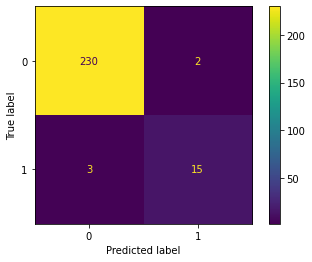

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

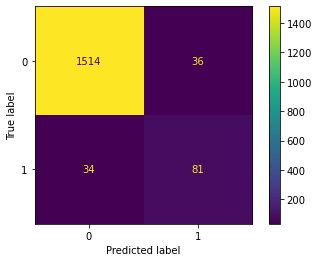

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, predictions_xg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y, predictions_xg))
print(recall_score(y, predictions_xg))
print(f1_score(y,predictions_xg))

0.7596153846153846
0.6869565217391305
0.7214611872146118


In [71]:
np.arange(0,1,0.1)


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [72]:
thresh = np.arange(0,1,10)

predictions_test = (probs_xg[:,1] >= threshold).astype('int')


print(precision_score(y, predictions_test))
print(recall_score(y, predictions_test))
print(f1_score(y,predictions_test))

0.7192982456140351
0.7130434782608696
0.7161572052401747


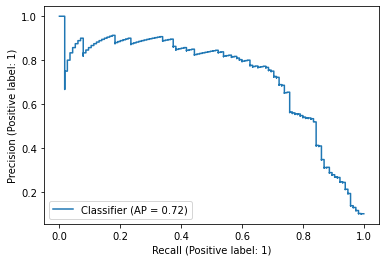

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
fig = PrecisionRecallDisplay.from_predictions(y,probs_xg[:,1])
fig.figure_.savefig("precisionrecall")

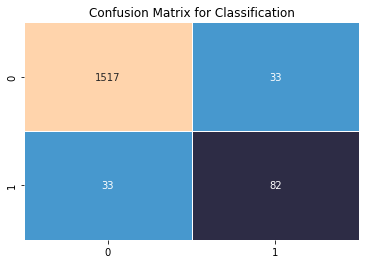

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
confusiondata = [[1517,33],
                  [33,82]]
yticklabels = ["Positive", "Negative"]
xticklabels = ["Positive", "Negative"]
ax = plt.axes()
fig = sns.heatmap(confusiondata,linewidths=.5, annot=True, ax=ax, vmin = 0, vmax = 200,cmap="icefire",cbar = False,fmt='g')
ax.set_title("Confusion Matrix for Classification")
figure = fig.get_figure()    

figure.savefig("ConfusionMatrix.png") 